In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
path = '/lustre/storeB/project/nwp/havvind/hav/results/experiment/EXP-03/norkyst_avg_0001.nc'
ocean = xr.open_dataset(path)

In [5]:
path = '/lustre/storeB/project/nwp/havvind/atmosphere/turbines/2022/03/01/12/fc2022030112_turbines.nc'
atmos = xr.open_dataset(path)

In [6]:
atmos

<xarray.Dataset>
Dimensions:                                                                  (
                                                                              time: 7,
                                                                              SFXheight0: 1,
                                                                              SFXheight1: 1,
                                                                              SFXheight2: 1,
                                                                              SFXheight3: 1,
                                                                              ...
                                                                              isotherm_0C_level: 1,
                                                                              isotherm_0C_level_from_above: 1,
                                                                              adiabatic_condensation_level: 1,
                                                                              top_of_atmosphere: 1,
                                                                              x: 949,
                                                                              y: 1069)
Coordinates: (12/28)
  * time                                                                     (time) datetime64[ns] ...
  * SFXheight0                                                               (SFXheight0) float32 ...
  * SFXheight1                                                               (SFXheight1) float32 ...
  * SFXheight2                                                               (SFXheight2) float32 ...
  * SFXheight3                                                               (SFXheight3) float32 ...
  * SFXheight4                                                               (SFXheight4) float32 ...
    ...                                                                       ...
  * adiabatic_condensation_level                                             (adiabatic_condensation_level) int16 ...
  * top_of_atmosphere                                                        (top_of_atmosphere) int16 ...
  * x                                                                        (x) float32 ...
  * y                                                                        (y) float32 ...
    longitude                                                                (y, x) float64 ...
    latitude                                                                 (y, x) float64 ...
Data variables: (12/101)
    forecast_reference_time                                                  datetime64[ns] ...
    p0                                                                       float64 ...
    ap                                                                       (hybrid) float64 ...
    b                                                                        (hybrid) float64 ...
    projection_lambert                                                       int32 ...
    ga_rsn_103                                                               (time, height1, y, x) float64 ...
    ...                                                                       ...
    SFX_LE                                                                   (time, SFXheight0, y, x) float32 ...
    SFX_FMV                                                                  (time, SFXheight0, y, x) float32 ...
    SFX_Z0                                                                   (time, SFXheight3, y, x) float32 ...
    SFX_Z0H                                                                  (time, SFXheight4, y, x) float32 ...
    integral_of_toa_net_downward_shortwave_flux_wrt_time_assuming_clear_sky  (time, top_of_atmosphere, y, x) float32 ...
    integral_of_toa_downwelling_shortwave_flux_wrt_time                      (time, top_of_atmosphere, y, x) float32 ...
Attributes: (12/14)
    Conventions:         CF-1.6
    instituti

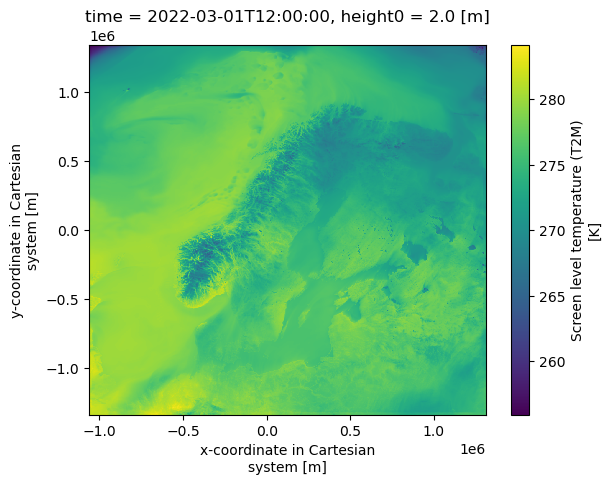

In [8]:
atmos.air_temperature_2m.isel(time=0, height0=0).plot()